## Vedant Ganesh - 230968340
- ### Week 2 - Exercise 2
- ### Date - 05/08/2025

In [390]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.losses import MAE, MeanSquaredError

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

#### 1. Model import, EDA and preprocessing

In [392]:
df = pd.read_csv('bodyfat(in).csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None 

          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.15079

<Axes: >

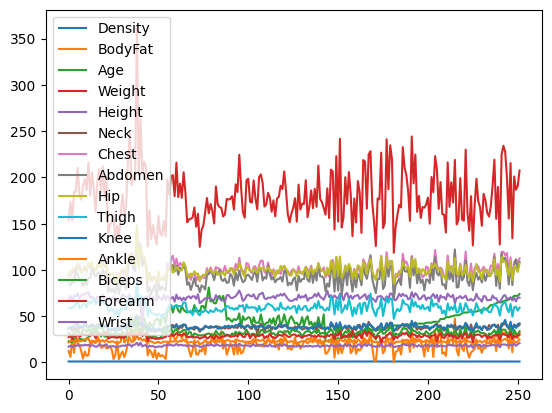

In [393]:
print(df.info(), '\n')
print(df.describe())
df.plot()

#### 2. X and y split, train and test split

In [395]:
X = df.drop('BodyFat', axis = 1)
y = df['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)
print("Shape of X_train, X_test, y_train, y_test is : ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of X_train, X_test, y_train, y_test is :  (226, 14) (26, 14) (226,) (26,)


In [396]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



#### 3. Model architecture

In [417]:
model = Sequential(
    [
        Input(shape=(X_train.shape[1], ), name="Input"),
        Dense(units=128, activation='relu', name='H1'),
        Dense(units=128, activation='relu', name='H2'),
        Dense(units=128, activation='relu', name='H3'),
        Dense(units=1, activation='relu', name='Output')
    ]
)

model.compile(loss='mse' ,optimizer=Adam(learning_rate=0.01), metrics=['mse'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 H1 (Dense)                  (None, 128)               1920      
                                                                 
 H2 (Dense)                  (None, 128)               16512     
                                                                 
 H3 (Dense)                  (None, 128)               16512     
                                                                 
 Output (Dense)              (None, 1)                 129       
                                                                 
Total params: 35073 (137.00 KB)
Trainable params: 35073 (137.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 4. Model training

In [420]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=10)

Epoch 1/100
21/21 [==============================] - 1s 7ms/step - loss: 141.7998 - mse: 141.7998 - val_loss: 69.1521 - val_mse: 69.1521
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 48.5066 - mse: 48.5066 - val_loss: 35.6526 - val_mse: 35.6526
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 15.4120 - mse: 15.4120 - val_loss: 7.5717 - val_mse: 7.5717
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 8.6764 - mse: 8.6764 - val_loss: 3.2978 - val_mse: 3.2978
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 4.7882 - mse: 4.7882 - val_loss: 4.1535 - val_mse: 4.1535
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 3.2376 - mse: 3.2376 - val_loss: 2.2710 - val_mse: 2.2710
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 2.5532 - mse: 2.5532 - val_loss: 1.7490 - val_mse: 1.7490
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss

In [401]:
print("keys are: ", history.history.keys())
Keys = list(history.history.keys())

keys are:  dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


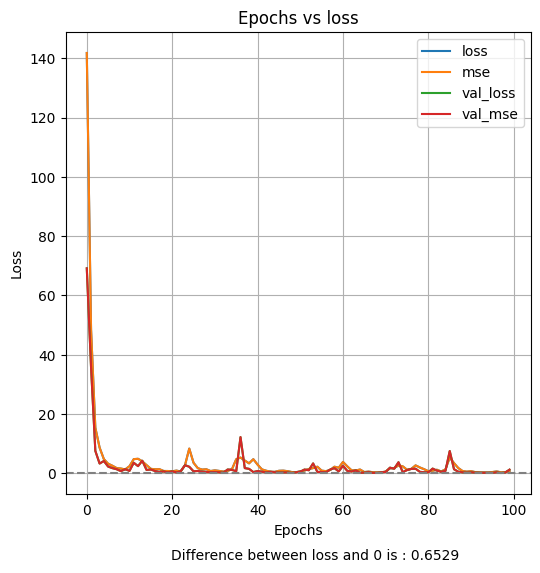

In [422]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['mse'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_mse'])
plt.plot(history.history['val_loss'])
plt.axhline(0.0, color='grey', linestyle='--')
plt.legend(Keys)
plt.figtext(0.3, 0,f"Difference between loss and 0 is : {history.history['loss'][-1]:.4f}")


plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs loss")
plt.grid(True)
plt.show()

#### 5. Testing

Evaluation
1/1 [==============================] - 0s 24ms/step - loss: 0.9768 - mse: 0.9768
Loss :  0.9768310189247131 

Prediction
1/1 [==============================] - 0s 50ms/step


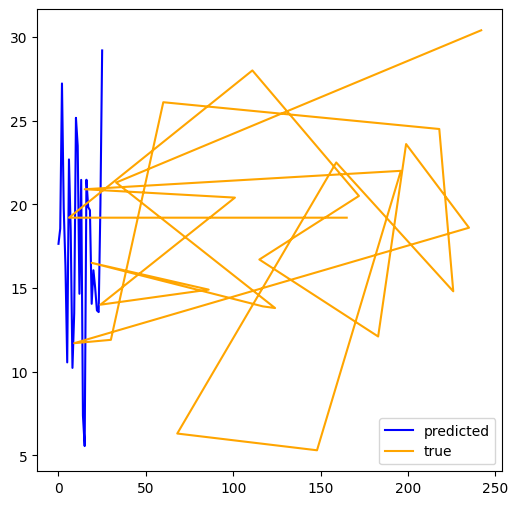

In [425]:
print("Evaluation")
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss : ", loss, '\n')

print("Prediction")
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.plot(y_pred, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.legend(['predicted','true'])
plt.show()


#### 6. Insights 
Model is converging well but the final training loss at the loss epoch is still pretty high. By tuning hyperparamters like epochs, batch, learning_rate, units, etc. we can find an optimum value of epochs = 100, batch = 10, learning_rate = 0.01, units = [128, 64, 32]. 